### Introduction to Stable Diffusion

#### Simplified Explanation

Imagine you have a picture that you want to describe in words. This task is a bit like describing a scene to a friend who cannot see it. Now, imagine you could reverse this process—starting with a description and creating a picture from it. Stable Diffusion is a type of artificial intelligence (AI) that can do just that! It reads a description (like "a fantasy landscape with mountains and a river") and creates an image based on those words.

Stable Diffusion uses a special process to transform noise (random dots) into meaningful images, gradually making them clearer and more detailed until they match the description.

#### Detailed Explanation

Stable Diffusion is a sophisticated AI model designed to generate images from text descriptions. It operates by iteratively refining a noisy image, guided by the features of the given description. This process leverages a type of neural network known as a "diffusion model," which has been trained on vast datasets of images and their corresponding descriptions.

In this process, the model starts with a random noise image and uses the text description to guide its transformation into a coherent image. Through multiple steps, the model reduces the noise, sharpening details and ensuring the image aligns with the text prompt.

### Mathematical and Algorithmic Description

Stable Diffusion models are based on the principles of diffusion processes and denoising autoencoders. The key idea is to model the distribution of images conditioned on text descriptions. Here's a step-by-step breakdown of the math and algorithm:

1. **Diffusion Process:**
   - The diffusion process involves adding Gaussian noise to an image over several time steps, transforming it into pure noise.
   - Let $ x_0 $ be the original image, and $ x_t $ be the image at time step $ t $. The forward diffusion process can be described by:
     $$ q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1 - \alpha_t)I) $$
   - Here, $ \alpha_t $ controls the amount of noise added at each step.

2. **Reverse Process:**
   - The reverse process aims to denoise the image, step by step, to recover the original image from pure noise.
   - This reverse process is modeled using a neural network, parameterized by $ \theta $, which predicts the original image from noisy observations:
     $$ p_\theta(x_{t-1} | x_t) = \mathcal{N}(x_{t-1}; \mu_\theta(x_t, t), \Sigma_\theta(x_t, t)) $$
   - The network learns the mean $ \mu_\theta $ and variance $ \Sigma_\theta $ to approximate the reverse diffusion process.

3. **Training:**
   - The model is trained to minimize the difference between the predicted noise and the actual noise added during the diffusion process.
   - The loss function typically used is the mean squared error between the predicted noise and the actual noise:
     $$ \mathcal{L}(\theta) = \mathbb{E}_{x_0, \epsilon, t} \left[ \| \epsilon - \epsilon_\theta(x_t, t) \|^2 \right] $$
   - Here, $ \epsilon $ represents the actual noise, and $ \epsilon_\theta $ is the model's prediction.

### What Happens in the Code

The provided code snippet demonstrates the use of a pre-trained Stable Diffusion model to generate an image from a text description:

1. **Loading the Model:**
   - The model, identified by `CompVis/stable-diffusion-v1-4`, is loaded from Hugging Face's model hub.
   - The model is moved to the appropriate device (GPU or CPU) for efficient computation.

2. **Text Prompt:**
   - A text description, or prompt, is defined. This prompt serves as the basis for generating the image.

3. **Generating the Image:**
   - The model starts with a random noise image.
   - It iteratively refines the image, guided by the features extracted from the text prompt.
   - The process involves reducing the noise and enhancing details to match the prompt.

4. **Saving and Displaying:**
   - The generated image is saved to a file and displayed.

In summary, Stable Diffusion leverages a sophisticated diffusion process, neural networks, and extensive training to transform text descriptions into detailed images, offering a powerful tool for AI-driven image generation.

In [ ]:
!pip install diffusers transformers torch accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 17.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

# Change runtime to GPU (above in runtime menu)

In [ ]:
import torch
print(torch.cuda.is_available())

True


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.w

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


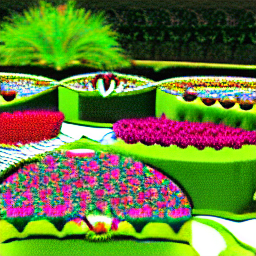

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the pipeline with smaller image size
pipeline = StableDiffusionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

# Define a new text prompt
prompt = "A beautiful garden full of colorful flowers"

# Define a custom configuration for faster inference
# Note: 'height' and 'width' should be multiples of 8
height = 256  # Reduce from the default 512
width = 256   # Reduce from the default 512
num_inference_steps = 25  # Reduce from the default 50

# Generate the image with custom configuration
with torch.autocast("cuda"):
    image = pipeline(prompt, height=height, width=width, num_inference_steps=num_inference_steps).images[0]

# Save the generated image
image.save("generated_image.png")

# Display the image using PIL and IPython.display
display(image)

## If you get a black image, re-run or try changing the prompt